In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


In [35]:

df=pd.read_csv('housing.csv')


In [36]:
print("Missing values before handling:")
print(df.isna().sum())

num_imputer = SimpleImputer(strategy='median')
df[numeric_features] = num_imputer.fit_transform(df[numeric_features])

df = df.dropna(subset=categorical_features)

print("\nMissing values after handling:")
print(df.isna().sum())

Missing values before handling:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Missing values after handling:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [37]:

X = df.drop('median_house_value', axis=1)
y = df['median_house_value']


In [38]:

numeric_features = ['longitude', 'latitude', 'housing_median_age', 
                   'total_rooms', 'total_bedrooms', 'population', 
                   'households', 'median_income']
categorical_features = ['ocean_proximity']


In [39]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


In [40]:
X_processed = preprocessor.fit_transform(X)

In [41]:

cat_encoder = preprocessor.named_transformers_['cat']
cat_features = list(cat_encoder.get_feature_names_out(categorical_features))
all_feature_names = numeric_features + cat_features


In [42]:

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


In [43]:

lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train, y_train)


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.263e+12, tolerance: 2.207e+10
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1, random_state=42)

In [44]:

coef_df = pd.DataFrame({ 'Feature': all_feature_names,'Coefficient': lasso.coef_})


In [45]:

selected_features = coef_df[coef_df['Coefficient'] != 0].sort_values('Coefficient', key=abs, ascending=False)

In [46]:

y_pred = lasso.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [47]:

print("="*60)
print("Lasso Regression Results (α=0.1)")
print("="*60)
print(f"\nSelected Features ({len(selected_features)}/{len(coef_df)}):")
print(selected_features.to_string(index=False))

Lasso Regression Results (α=0.1)

Selected Features (13/13):
                   Feature   Coefficient
    ocean_proximity_ISLAND 151553.383192
             median_income  74991.182532
                  latitude -54397.396329
                 longitude -53769.564493
                population -43227.784562
            total_bedrooms  43107.089057
    ocean_proximity_INLAND -23945.730550
ocean_proximity_NEAR OCEAN  19271.508143
                households  18446.416739
 ocean_proximity_<1H OCEAN  15841.381999
        housing_median_age  13871.409789
               total_rooms -13134.242610
  ocean_proximity_NEAR BAY  10703.746989


In [48]:

print("\n" + "-"*60)
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"\nSparsity Effect: Lasso eliminated {len(coef_df)-len(selected_features)} features")
print("="*60)


------------------------------------------------------------
R² Score: 0.6254
MSE: 4908492180.7109

Sparsity Effect: Lasso eliminated 0 features


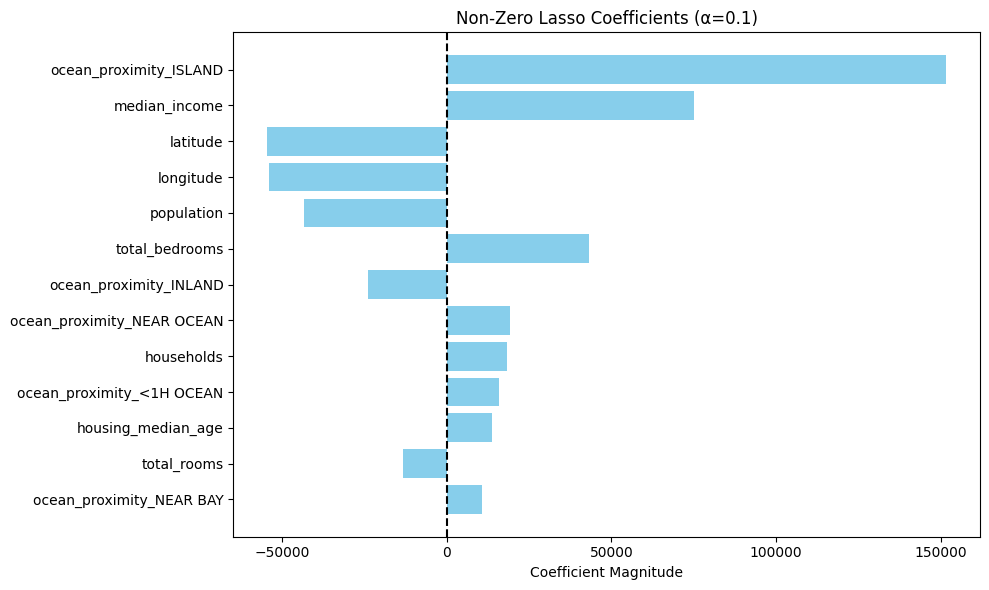

In [49]:

plt.figure(figsize=(10, 6))
plt.barh(selected_features['Feature'], selected_features['Coefficient'],  color='skyblue')
plt.axvline(0, color='k', linestyle='--')
plt.xlabel('Coefficient Magnitude')
plt.title('Non-Zero Lasso Coefficients (α=0.1)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [50]:

lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train, y_train)

coef_df = pd.DataFrame({'Feature': all_feature_names,'Coefficient': lasso.coef_})

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.263e+12, tolerance: 2.207e+10
  model = cd_fast.enet_coordinate_descent(


In [51]:

selected_features = coef_df[coef_df['Coefficient'] != 0].sort_values('Coefficient', key=abs, ascending=False)

In [52]:

y_pred = lasso.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [53]:

print("="*60)
print("Lasso Regression Results (α=0.1)")
print("="*60)
print(f"\nSelected Features ({len(selected_features)}/{len(coef_df)}):")
print(selected_features.to_string(index=False))

Lasso Regression Results (α=0.1)

Selected Features (13/13):
                   Feature   Coefficient
    ocean_proximity_ISLAND 151553.383192
             median_income  74991.182532
                  latitude -54397.396329
                 longitude -53769.564493
                population -43227.784562
            total_bedrooms  43107.089057
    ocean_proximity_INLAND -23945.730550
ocean_proximity_NEAR OCEAN  19271.508143
                households  18446.416739
 ocean_proximity_<1H OCEAN  15841.381999
        housing_median_age  13871.409789
               total_rooms -13134.242610
  ocean_proximity_NEAR BAY  10703.746989


In [54]:

print("\n" + "-"*60)
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"\nSparsity Effect: Lasso eliminated {len(coef_df)-len(selected_features)} features")
print("="*60)


------------------------------------------------------------
R² Score: 0.6254
MSE: 4908492180.7109

Sparsity Effect: Lasso eliminated 0 features


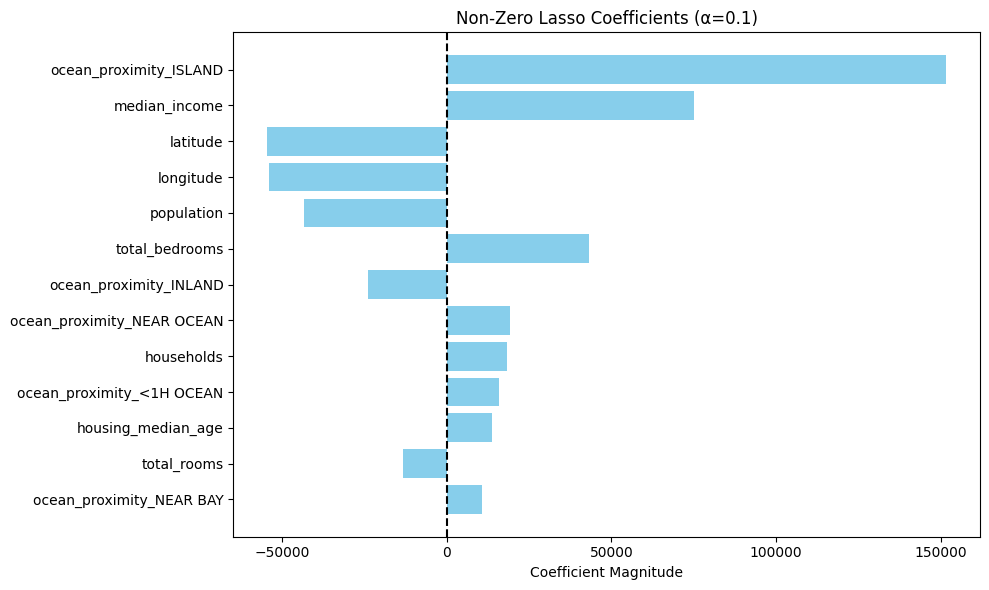

In [55]:

plt.figure(figsize=(10, 6))
plt.barh(selected_features['Feature'], 
         selected_features['Coefficient'], 
         color='skyblue')
plt.axvline(0, color='k', linestyle='--')
plt.xlabel('Coefficient Magnitude')
plt.title('Non-Zero Lasso Coefficients (α=0.1)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()